## This script downsizes images and saves them as numpy array to train the VAE

In [1]:
#%pip install Pillow
#%pip install opencv-python

In [1]:
import os
import cv2
import numpy as np
from tqdm import tqdm  
import os
from PIL import Image
import random
import matplotlib.pyplot as plt

In [21]:
# Change accordingly

# Input and output folders
input_folder_path = r'C:\Users\foo\Documents\GroovyBrain\images\raw'
output_folder_path = r'C:\Users\foo\Documents\GroovyBrain\images\downsized'

# Define the paths for numpy array
train_path = r'C:\Users\foo\Documents\GroovyBrain\images\downsized\train'
test_path = r'C:\Users\foo\Documents\GroovyBrain\images\downsized\test'

train_save_path = r'C:\Users\foo\Documents\GroovyBrain\images\numpy'
test_save_path = r'C:\Users\foo\Documents\GroovyBrain\images\numpy'

# Set new downsized pixel dimensions
n_pixels = 64

In [24]:
# Resize and save images

# Loop over train and test images
train_test = ['\\train', '\\test']
for i in train_test:

    input_folder  = input_folder_path + i
    output_folder = output_folder_path + i

    # Ensure the output folder exists
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Get a list of all image files in the input folder
    image_files = [f for f in os.listdir(input_folder) if f.lower().endswith(('.jpg', '.jpeg'))]

    # Shuffle the image files randomly
    random.shuffle(image_files)

    # Function to save downscaled image with unique name
    def save_downscaled_image(input_path, output_folder, index):
        # Open the image
        with Image.open(input_path) as img:
            # Resize the image
            img_resized = img.resize((n_pixels, n_pixels))

            # Generate the output file name with zero-padding
            output_filename = f'image_{index:04d}.jpg'

            # Save the downscaled image to the output folder
            output_path = os.path.join(output_folder, output_filename)
            img_resized.save(output_path)

    # Process each image and save downscaled version
    for index, image_file in enumerate(tqdm(image_files, desc="Processing Images"), start=1):
        input_path = os.path.join(input_folder, image_file)
        save_downscaled_image(input_path, output_folder, index)
    
    

Processing Images: 100%|█████████████████████████████████████████████████████████| 6400/6400 [00:03<00:00, 1629.26it/s]


Save images as numpy array

In [25]:
# Function to load images from a directory
def load_images_from_directory(directory):
    images = []
    files = [filename for filename in os.listdir(directory) if filename.endswith(".jpg")]

    for filename in tqdm(files, desc=f"Loading images from {directory}"):
        if filename.endswith(".jpg"):
            img_path = os.path.join(directory, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read images in grayscale
            images.append(img)
    return np.array(images)

# Load train and test images
train_images = load_images_from_directory(train_path)
test_images = load_images_from_directory(test_path)

# Print shape of loaded data
print("Train images shape:", train_images.shape)
print("Test images shape:", test_images.shape)


Loading images from C:\Users\judel\Documents\GroovyBrain\images\downsized\train: 100%|█| 33984/33984 [02:11<00:00, 258.
Loading images from C:\Users\judel\Documents\GroovyBrain\images\downsized\test: 100%|█| 6400/6400 [00:21<00:00, 295.05i

Train images shape: (33984, 64, 64)
Test images shape: (6400, 64, 64)


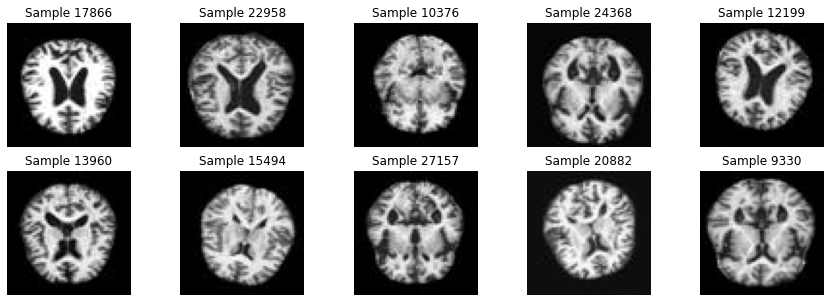

In [26]:
# Plot a random selection of downsized images

# Select 10 random indices
random_indices = random.sample(range(train_images.shape[0]), 10)

# Plot the images
plt.figure(figsize=(15, 5))

for i, idx in enumerate(random_indices, 1):
    plt.subplot(2, 5, i)
    plt.imshow(train_images[idx], cmap='gray')  # Assuming the images are grayscale
    plt.title(f"Sample {idx}")
    plt.axis('off')

plt.show()


Save numpy array

In [27]:
# Create the directories if they don't exist
os.makedirs(train_save_path, exist_ok=True)
os.makedirs(test_save_path, exist_ok=True)

# Save train_images and test_images
np.save(os.path.join(train_save_path, 'train_images.npy'), train_images)
np.save(os.path.join(test_save_path, 'test_images.npy'), test_images)
